# 1.Linear Regression
### 공부시간에 따른 시험 점수 y = mx + b 단순선현회귀(독립변수 1)

In [3]:
import matplotlib.pyplot as plt # 데이터 시각화
import pandas as pd #데이터 가공\

In [4]:
dataset = pd.read_csv('LinearData1.csv')

In [5]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [6]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 칼럼 직전까지의 데이터 (독립변수 - 원인)
y = dataset.iloc[:,-1].values # 마지막 칼럼 데이터 (종속변수 - 결과) 

In [7]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체 생성
reg.fit(X,y) # 학습 (모델 생성)

LinearRegression()

In [9]:
y_pred = reg.predict(X) # X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

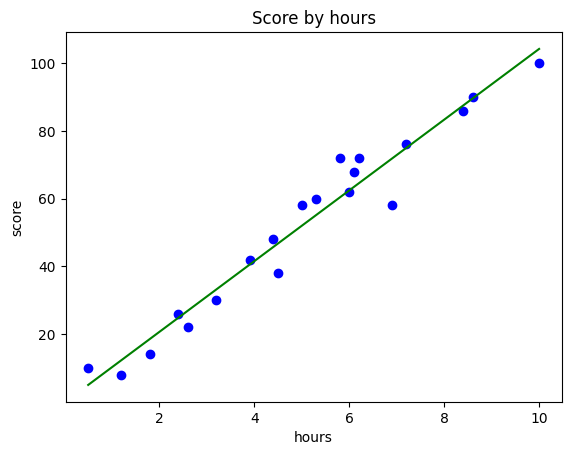

In [10]:
plt.scatter(X,y,color = 'blue') #산점도
plt.plot(X,y_pred,color='green') #선 그래프
plt.title('Score by hours')
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [11]:
print("9시간 공부했을 때 예상 점수 :",reg.predict([[9],[8],[7]])) #각각 2차원 배열 형식 [[9],[8],[7]]

9시간 공부했을 때 예상 점수 : [93.77478776 83.33109082 72.88739388]


In [12]:
reg.coef_ # 기울기(m)

array([10.44369694])

In [13]:
reg.intercept_ # y절편 (b)

-0.218484702867201

### 데이터 세트 분리

In [14]:
import matplotlib.pyplot as plt # 데이터 시각화
import pandas as pd #데이터 가공

In [15]:
dataset = pd.read_csv('LinearData1.csv')

In [16]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) # 훈련 80 : 테스트 20

In [20]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

### 분리된 데이터를 통한 모델링

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
reg.fit(X_train,y_train) #훈련세트로 학습

LinearRegression()

### 데이터 시각화

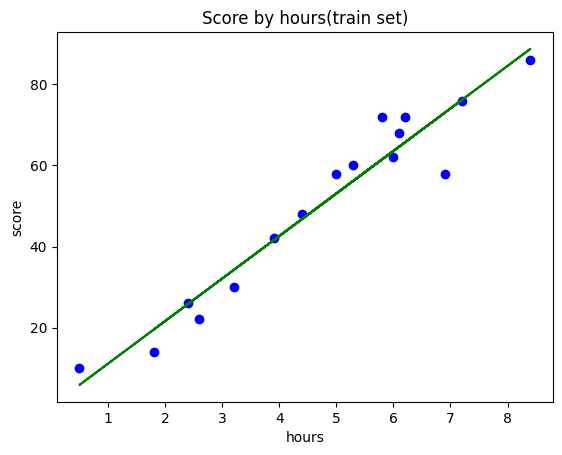

In [24]:
plt.scatter(X_train,y_train,color = 'blue') #산점도
plt.plot(X_train,reg.predict(X_train),color='green') #선 그래프
plt.title('Score by hours(train data)')
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

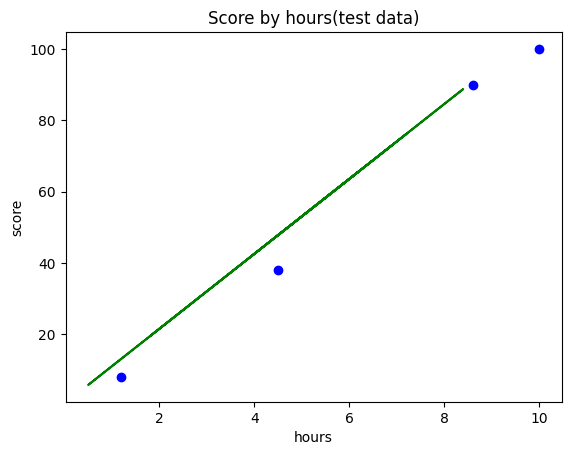

In [25]:
plt.scatter(X_test,y_test,color = 'blue') #산점도
plt.plot(X_train,reg.predict(X_train),color='green') #선 그래프
plt.title('Score by hours(test data)')
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [26]:
reg.coef_

array([10.49161294])

In [27]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [31]:
reg.score(X_test, y_test)


0.9727616474310156

In [30]:
reg.score(X_train, y_train)

0.9356663661221668

### 경사하강법(Gradient Descent)

max_iter : 훈련세트 반복 휫수 (Epoch 휫수)

eta0 : 학습률(learning rate)

In [44]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법
# sr = SGDRegressor(max_iter=100000, eta0=1e-4, random_state=0,verbose=1)
sr = SGDRegressor()
sr.fit(X_train,y_train)

SGDRegressor()

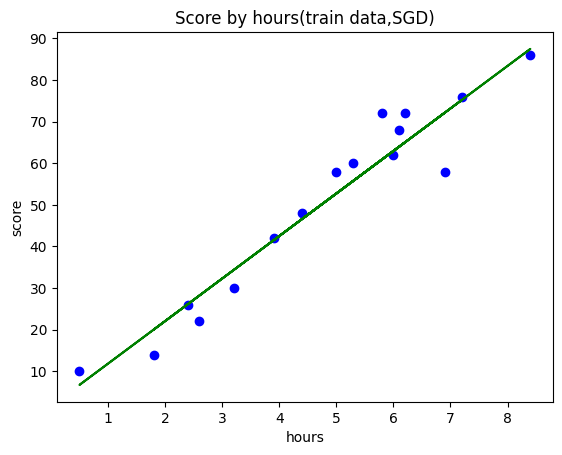

In [45]:
plt.scatter(X_train,y_train,color = 'blue') #산점도
plt.plot(X_train,sr.predict(X_train),color='green') #선 그래프
plt.title('Score by hours(train data,SGD)')
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [33]:
sr.coef_, sr.intercept_

(array([10.42654625]), array([0.83610383]))

In [36]:
sr.score(X_test,y_test)

0.9736009751993733